In [41]:
# to delete, moved to requirement.txt
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn


source: Error encountered while sourcing file '/home/julian/Documents/ENSIMAG/3A/Conf_techno/Margo/deltalake/tmpenv/lib/python3.12/site-packages/virtualfish/virtual.fish':
source: Aucun fichier ou dossier de ce nom

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
source: Error encountered while sourcing file '/home/julian/Documents/ENSIMAG/3A/Conf_techno/Margo/deltalake/tmpenv/lib/python3.12/site-packages/virtualfish/virtual.fish':
source: Aucun fichier ou dossier de ce nom

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
source: Error encountered while sourcing file '/home/julian/Documents/ENSIMAG/3A/Conf_techno/Margo/deltalake/tmpenv/lib/python3.12/site-packages/virtualfish/virtual.fish':
source: Aucun fichier ou dossier de ce nom

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Extraction des données

In [43]:
source = DataSource("./../data.json")

dataframe_list = source.filter([["WC"], ["Q"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)


len(athletes_data)

0

# Création d'un DataFrame utilisable pour le clustering

In [44]:
df_athletes = extractor.create_dataframe_clustering(
    athletes_data=athletes_data,
    exceptions=[
        "ski_base",
        "ski_deduction_total",
        "total_points",
        "top_air_execution",
        "bottom_air_execution",
        "top_air_points",
        "bottom_air_points",
    ],
)
df_athletes

,ski_points,air_points,time_points
YEMELYANOV Maxim,0.745557,0.571429,0.765408
BONDAREV Anton,0.676099,0.759425,0.560388
FENELEY William,0.467642,0.467893,0.716609
PORTELLO Ryan,0.513564,0.708995,0.434062
MICHEL Asher,0.223573,0.404762,0.675944
...,...,...,...
KAISLA Aleksi,0.869036,0.742063,0.924453
BELLUCCI Massimo,0.745557,0.763889,0.713718
MUSTONEN Miska,0.513564,0.722222,0.685885
VIERELA Severi,0.539549,0.460979,0.421913


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

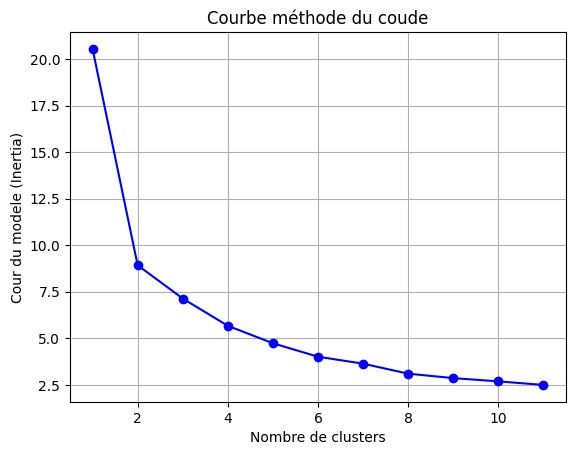

In [45]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker="o", color="blue")
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")
plt.title("Courbe méthode du coude")
plt.grid(1)
plt.show()

# Nettoyage des données (enlever anomalies)

In [ ]:
# clean_model = IsolationForest(contamination=0.01)  # noqa: ERA001
# clean_model.fit(df_athletes)  # noqa: ERA001
# plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))  # noqa: ERA001


# Clustering sur les données

In [47]:
model = KMeans(n_clusters=4)
model.fit(df_athletes)
model.predict(df_athletes)
df_athletes["cluster"] = model.fit_predict(df_athletes)
model.cluster_centers_

array([[0.65064119, 0.66628069, 0.52655112],
       [0.25908387, 0.27956729, 0.25233424],
       [0.49212739, 0.37413481, 0.49687493],
       [0.76407643, 0.76143744, 0.84679372]])

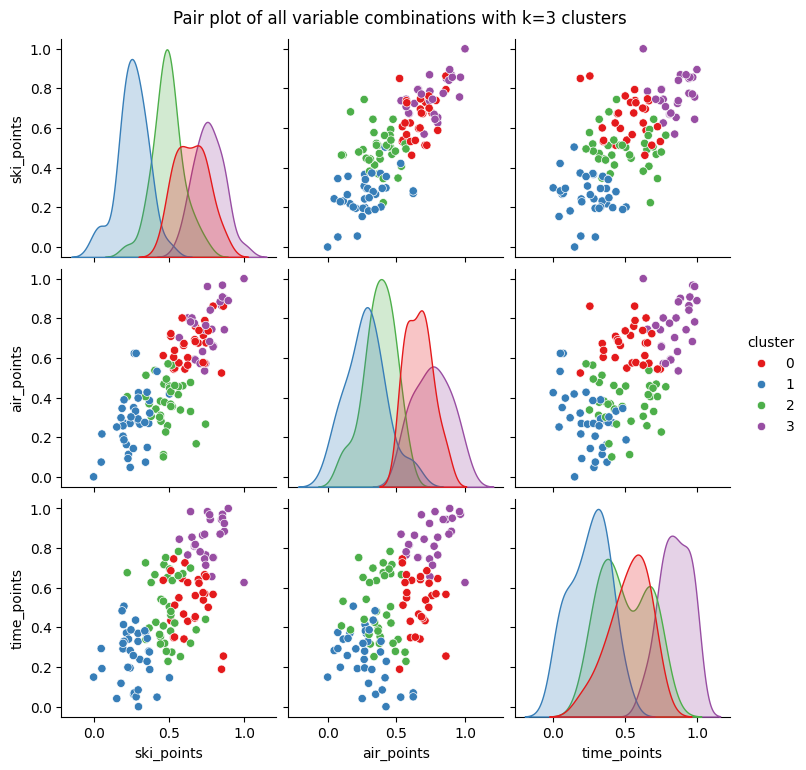

In [48]:
sns.pairplot(df_athletes, hue="cluster", palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

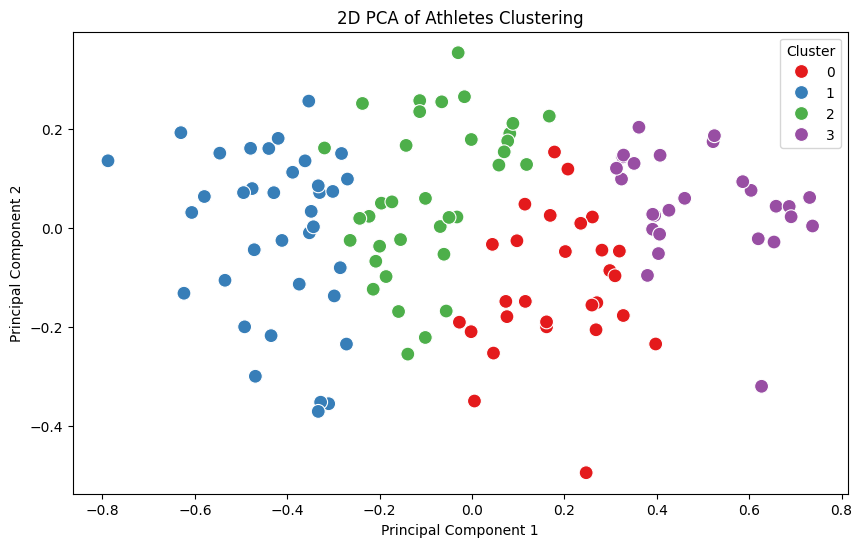

In [49]:
df_athletes_second = df_athletes.drop("cluster", axis=1)

reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes_second)

df_athletes["PCA1"] = athletes_reduced[:, 0]
df_athletes["PCA2"] = athletes_reduced[:, 1]

# Visualisation des clusters dans le nouvel espace 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_athletes, x="PCA1", y="PCA2", hue="cluster", palette="Set1", s=100)

# Ajout de titres et labels
plt.title("2D PCA of Athletes Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [50]:
reduct_model.components_

array([[ 0.54870753,  0.57785225,  0.60415794],
       [-0.25421871, -0.5731141 ,  0.77904626]])